In [1]:
library(ggplot2)

In [2]:
# Display structure of mtcars
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [3]:
# Convert cyl and am to factors:
mtcars$cyl <- factor(mtcars$cyl)
mtcars$am <- factor(mtcars$am)

In [4]:
# Define positions:
posn.d <- position_dodge(width = 0.1)
posn.jd <- position_jitterdodge(jitter.width = 0.1, dodge.width = 0.2)
posn.j <- position_jitter(width = 0.2)

In [6]:
# base layers:
wt.cyl.am <- ggplot(mtcars, aes(x = cyl, y = wt, col = am, 
                                fill = am, group = am))

## PREDEFINED FUNCTION WITH HMISC

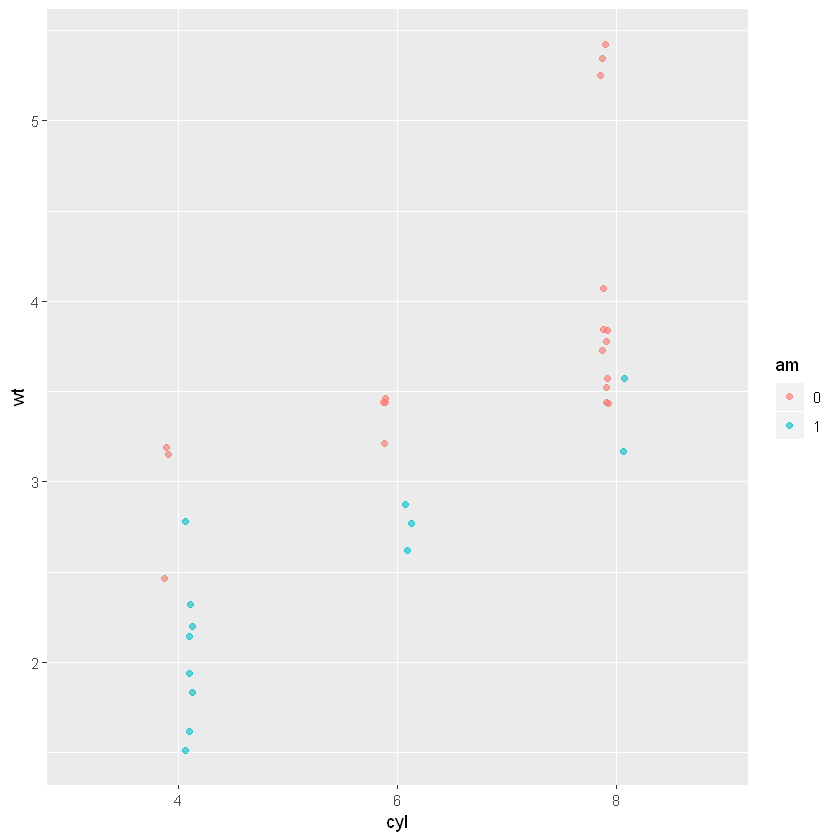

In [7]:
# Plot 1: Jittered, dodged scatter plot with transparent points
wt.cyl.am +
  geom_point(position = posn.jd, alpha = 0.6)

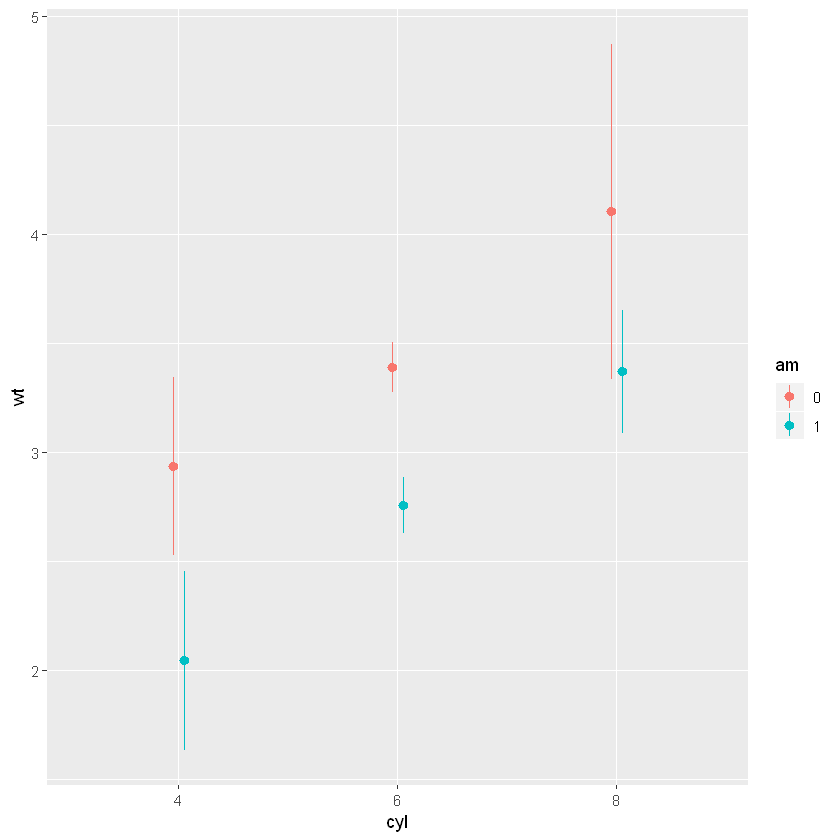

In [15]:
# Plot 2: Mean and SD - the easy way
library(Hmisc)
# ?smean.sd
wt.cyl.am +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn.d)

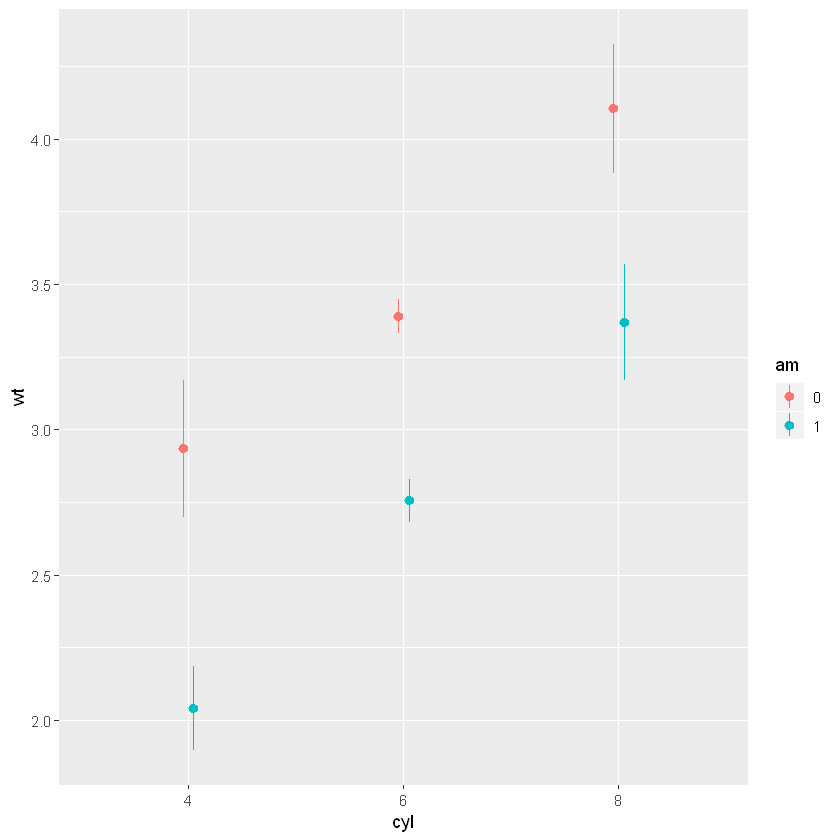

In [16]:
# Plot 3: Mean and 95% CI - the easy way
wt.cyl.am +
  stat_summary(fun.data = mean_cl_normal, fun.args = list(mult = 1), position = posn.d)

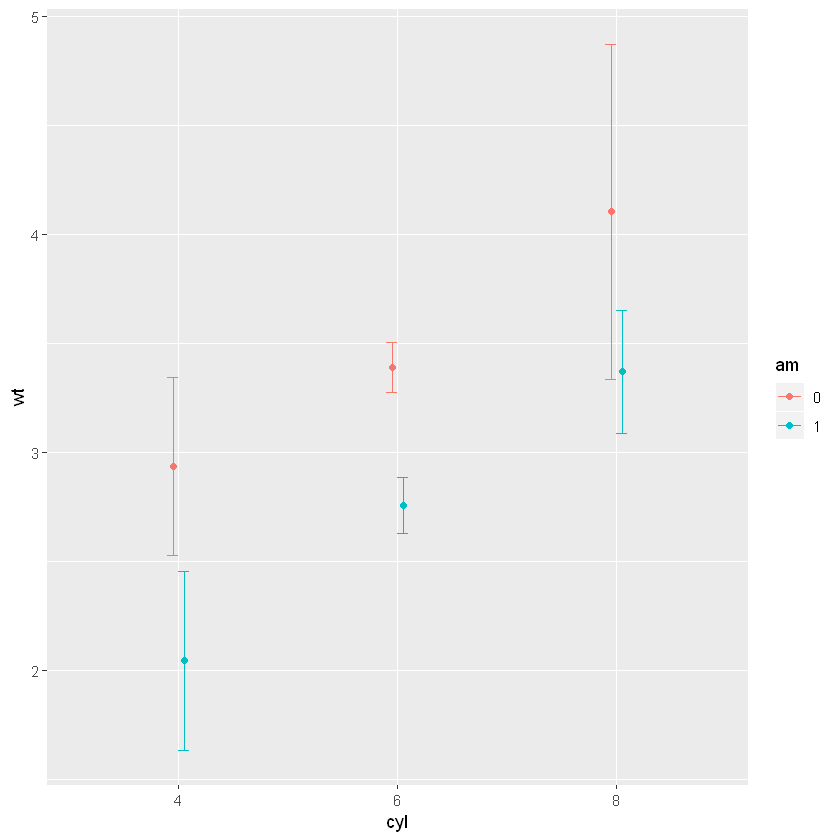

In [18]:
# Plot 4: Mean and SD - with T-tipped error bars
wt.cyl.am +
  stat_summary(geom = "point", fun.y = mean,
               position = posn.d) +
  stat_summary(geom = "errorbar", fun.data = mean_sdl,
               position = posn.d, fun.args = list(mult = 1), width = 0.1)

## STAT_SUMMARY

Summarise y values at distinct x values

In [19]:
# Function to save range for use in ggplot
gg_range <- function(x) {
  # Change x below to return the instructed values
  data.frame(ymin = min(x), # Min
             ymax = max(x)) # Max
}

# Function to Custom function:
med_IQR <- function(x) {
  # Change x below to return the instructed values
  data.frame(y = median(x), # Median
             ymin = quantile(x)[2], # 1st quartile
             ymax = quantile(x)[4])  # 3rd quartile
}

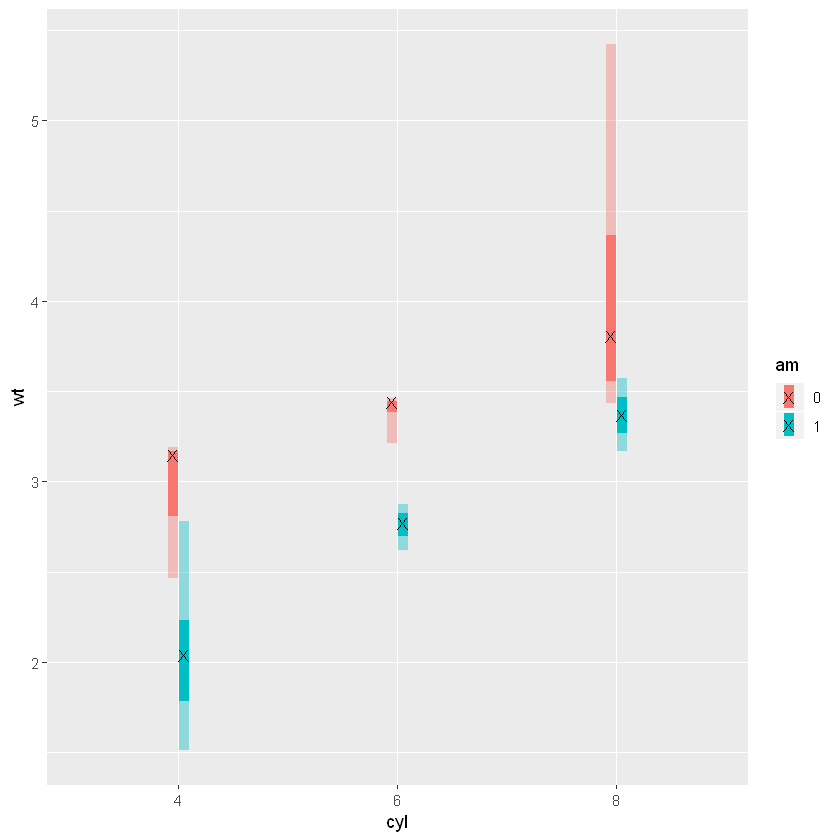

In [20]:
# Add three stat_summary calls to wt.cyl.am
wt.cyl.am +
  stat_summary(geom = "linerange", fun.data = med_IQR,
               position = posn.d, size = 3) +
  stat_summary(geom = "linerange", fun.data = gg_range,
               position = posn.d, size = 3,
               alpha = 0.4) +
  stat_summary(geom = "point", fun.y = median,
               position = posn.d, size = 3,
               col = "black", shape = "X")

## STAT_FUNCTION

Compute y values from a function of x values

Warning message:
"package 'MASS' was built under R version 3.5.2"Warning message:
"Ignoring unknown parameters: arg"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


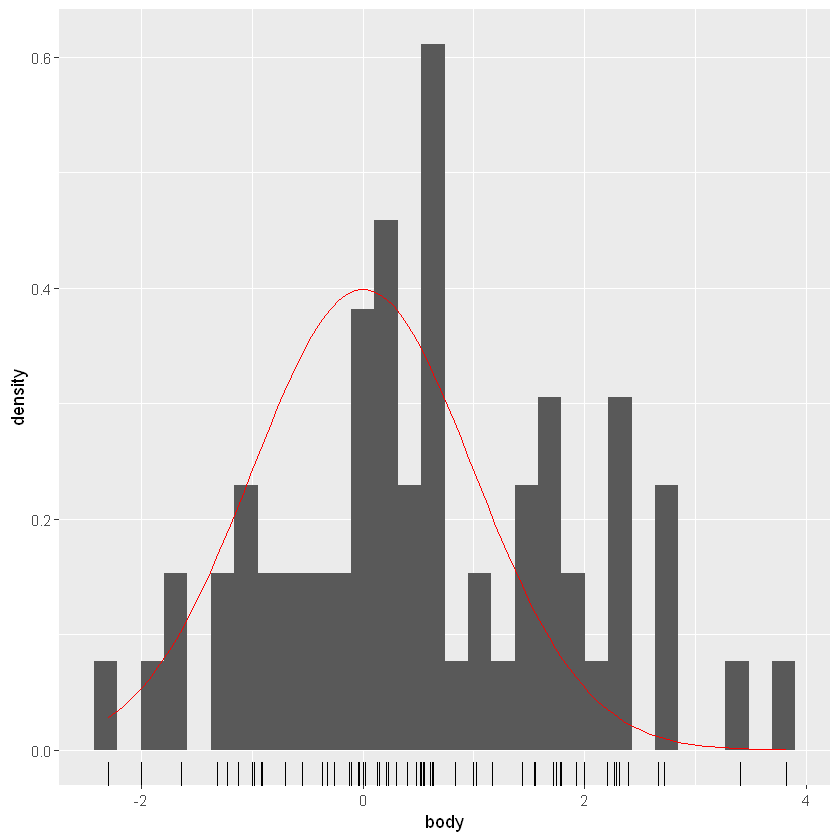

In [21]:
library(MASS)
mam.new <- data.frame(body = log10(mammals$body))
ggplot(mam.new, aes(x = body)) +
  geom_histogram(aes( y = ..density..)) +
  geom_rug() +
  stat_function(fun = dnorm, colour = "red",
                arg = list(mean = mean(mam.new$body),
                           sd = sd(mam.new$body)))

## STAT_QQ

In [23]:
#Perform calculations for a quantile-quantile plot
mam.new$slope <- diff(quantile(mam.new$body, c(0.25, 0.75))) / 
  diff(qnorm(c(0.25, 0.75)))
mam.new$int <- quantile(mam.new$body, 0.25) - 
  mam.new$slope * qnorm(0.25)
head(mam.new)

body,slope,int
0.5295587,1.411461,0.7260534
-0.3187588,1.411461,0.7260534
0.1303338,1.411461,0.7260534
2.6674530,1.411461,0.7260534
1.5602654,1.411461,0.7260534
1.4418522,1.411461,0.7260534


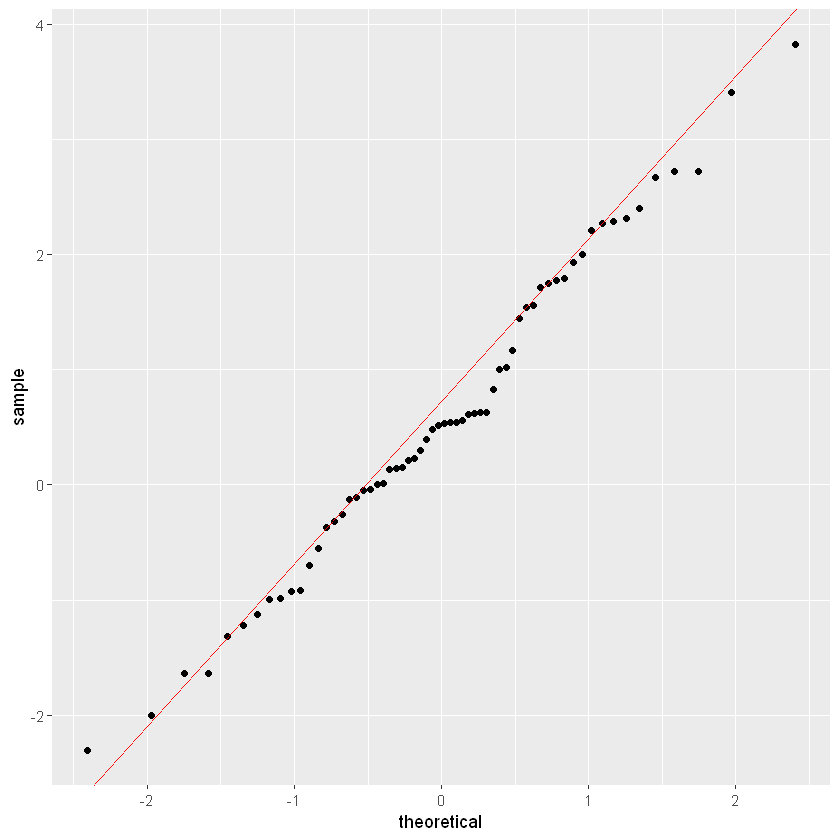

In [24]:
ggplot(mam.new, aes(sample = body)) +
  stat_qq() +
  geom_abline(aes(slope = slope, intercept = int), col = "red")